## Differential Equations

http://arachnoid.com/IPython/differential_equations.html

$$x(0) = x_0$$



$$\Delta x =  f(x) \Delta t.
$$

$$  x(\Delta t)  =   x(0) +   f(x(0)) \Delta t $$

Then we iterate this process: assuming we know the value of x(t ), we have that
    
$$x(t + \Delta t ) = x(t )+ f (x(t ))\Delta t .$$    


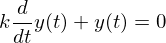

<IPython.core.display.Latex object>

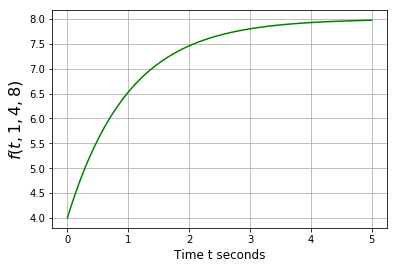

In [1]:
import numpy as np
from sympy import *
from IPython.display import *
import matplotlib.pyplot as plt
%matplotlib inline 
init_printing(use_latex=True)
var('a b t k C1')
y = Function("y")(t)
de = Eq(y+y.diff(t) * k)
display(de)
des = dsolve(de,y)
display(des)
des = des.subs(C1,0)
display(des)
f = Lambda((t,k,a,b),(a-b) * des.rhs + b)
display(Latex('$f(t,k,a,b) = ' + str(latex(f(t,k,a,b))) + '$'))
x = np.linspace(0,5,100)
plt.grid(True)
plt.xlabel('Time t seconds',fontsize=12)
plt.ylabel('$f(t,1,4,8)$',fontsize=16)
plt.plot(x,[f(t,1,4,8) for t in x],color='#008000')
plt.show()

In [5]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Euler method for ODE

In [20]:
# one example of ode

lamb = 0.5 
# Righthand side of differential equation
#def f(x):
#    return -x + 1

# if f(x) is negative funtion of x
def f(x):
    return -lamb*x

# if f(x) is positive funtion of x

def f(x):
    return lamb*x


In [21]:

# Define initial condition
#x0 = 0

x0 = 1
# Time step
dt = 0.01
# Solve the differential equation from time 0 to time T
T = 5
# Define discretized time ; assumes dt divides nicely into T
t = np.linspace (0, T, int(T/dt )+1)
# An array to store the solution
x = np.zeros (len(t))
# Integrate the differential equation using Euler ’s method
x[0] = x0
for i in xrange(1, len(t)):
    x[i] = x[i -1] + f(x[i -1])* dt



In [22]:
# Save the solution
#np.savetxt ('t.txt', t)
#np.savetxt ('x.txt', x)

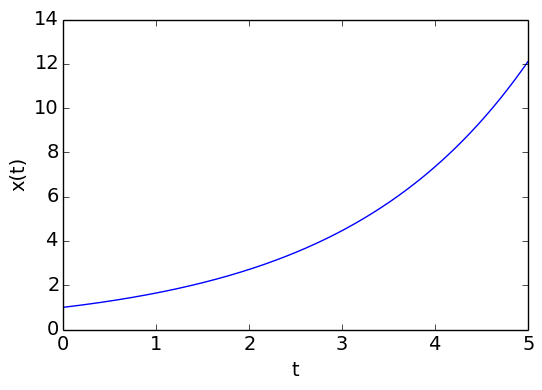

In [23]:
# Create a new figure
plt.figure ()
# Plot solution
plt.plot(t, x, color ='blue')
# Axis labels
plt.xlabel ('t')
plt.ylabel ('x(t)')
# Save figure
#plt.savefig ('plot.pdf')

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
%matplotlib inline
plt.rcParams.update({'font.size': 14})  # Make the labels larger

## let us change the initial points with lamb = 0.5 fixed

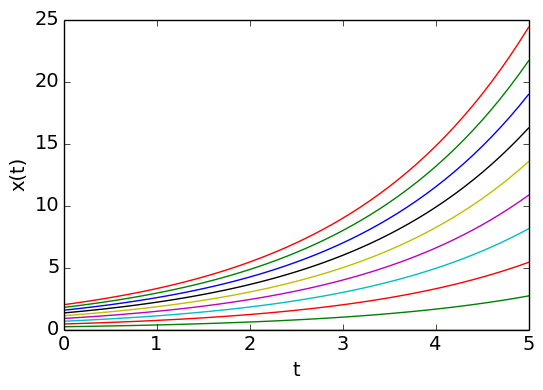

In [25]:
# let us change the initial points
h = 0.1;   # h is the spacing in time. 
tmax = 5.0; tmin = 0.0;
n = int((tmax-tmin)/h)  # n+1 is the number of points
ts = np.linspace(tmin, tmax, n+1)  # array of t values
def dxdt(x,t):
    return f(x)
x0s = np.linspace(0, 2, 10)
for x0 in x0s:
    xs = odeint(dxdt, x0, ts)
    plt.plot(ts, xs)

plt.xlabel('t'); plt.ylabel('x(t)');

## let us change the lamb with x0 =100 fixed

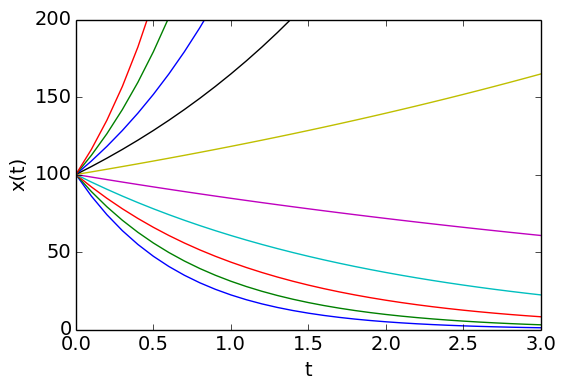

In [19]:
# let us change the lamb
 
x0 = 100
lambs = np.linspace(-1.5, 1.5, 10) # array of lamb values
for lamb0 in lambs:
    def dxdt(x,t):
        
        return lamb0*x
    xs = odeint(dxdt, x0, ts)
    plt.plot(ts, xs)
plt.xlim([0,3])
plt.ylim([0,200])
plt.xlabel('t'); plt.ylabel('x(t)');

In [67]:
from sympy import *
init_printing() 

### All the methods you need to solve ODE
http://ww2.math.buffalo.edu/306/

### Differential equation in sympy





In [71]:
x,  z, t = symbols('x  z t')
f, g, y = symbols('f g y', cls=Function)

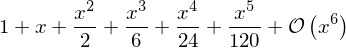

In [55]:
exp(x).series(x )

In [56]:
y(t)

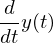

In [57]:
 y(t).diff(t)

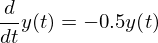

In [58]:
diffeq = Eq(y(t).diff(t), -0.5*y(t))
diffeq

In [59]:
dsolve(diffeq, y(t))

“it may be used to qualitatively visualize solutions, or to numerically approximate them.”

## Slope field


https://www.youtube.com/watch?v=hsTfC1Wmxqc



http://slopefield.nathangrigg.net/




---------


### Some visualization of slope field 

http://ww2.math.buffalo.edu/306/py/index.html


https://www.r-bloggers.com/generate-slope-fields-in-r-and-python/


http://stackoverflow.com/questions/18832763/drawing-directions-fields

http://www.mathscoop.com/calculus/differential-equations/slope-field-generator.php


https://www.youtube.com/watch?v=76WdBlGpxVw&list=PL64BDFBDA2AF24F7E

In [62]:
from numpy import *
import matplotlib.pyplot as plt
%matplotlib inline


In [36]:
def f(x,y):                # DE is y'=f(x,y) for 
   return x-y              # this function f

def yexact(x,x0,y0):       # exact solution y(x) that satisfies y(x0)=y0
   y=y0*exp(-x + x0) + (x*exp(x) - x0*exp(x0) - exp(x) + exp(x0))*exp(-x)
   return y

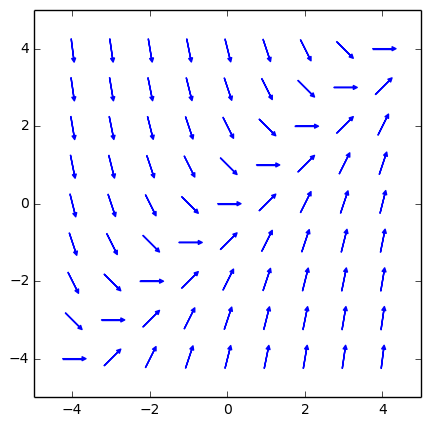

In [60]:
fig=plt.figure(figsize=(5,5))          # fig is figure variable
ax=fig.add_subplot(1,1,1) # in 1x1 array of subplots, ax is subplot 1

#					  I. Slope Field

xmesh=linspace(-4.,4.,9); ymesh=linspace(-4.,4.,9) # x and y mesh values

#                                       plot mini-tangent for
#                                       y'=f(x,y) at each mesh point
for xp in xmesh:
   for yp in ymesh:
      m=f(xp,yp)
      h=0.25/sqrt(1.+m**2)
      #ax = plt.axes()
      ax.plot([xp-h,xp+h],[yp-m*h,yp+m*h],'b')
      ax.arrow(xp-h,yp-m*h,2*h,2*m*h, head_width=0.1, head_length=0.1, fc='b', ec='b')  
                          

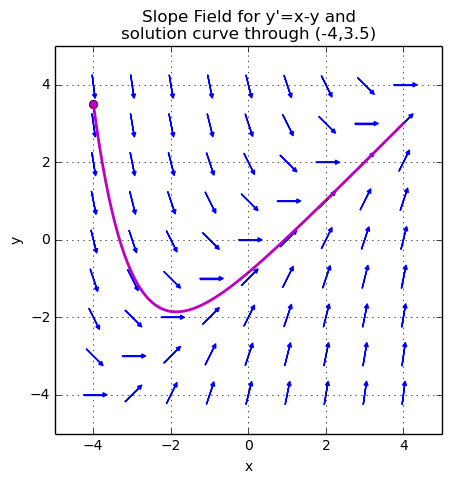

In [61]:
fig=plt.figure(figsize=(5,5))          # fig is figure variable
ax=fig.add_subplot(1,1,1) # in 1x1 array of subplots, ax is subplot 1

#					  I. Slope Field

xmesh=linspace(-4.,4.,9); ymesh=linspace(-4.,4.,9) # x and y mesh values

#                                       plot mini-tangent for
#                                       y'=f(x,y) at each mesh point
for xp in xmesh:
   for yp in ymesh:
      m=f(xp,yp)
      h=0.25/sqrt(1.+m**2)
      ax.plot([xp-h,xp+h],[yp-m*h,yp+m*h],'b')
      ax.arrow(xp-h,yp-m*h,2*h,2*m*h, head_width=0.1, head_length=0.1, fc='b', ec='b') 
                          
#					II. Dot at given (x0,y0) and solution curve through (x0,y0)
x0=-4.; y0=3.5
ax.plot([x0],[y0],'mo') # 'm'agenta d'o't
X=linspace(-4.,4.,101)  # X[0]=-4., .., X[100]=4.
Y=yexact(X,x0,y0)
ax.plot(X,Y,'m',linewidth=2) # lines joining points (X[i],Y[i]), 'm'agenta

ax.set_xlabel('x'); ax.set_ylabel('y')
ax.grid(True)           # add a grid to the plot
ax.set_aspect(1.)       # require that (scaling factor for y)/(scaling factor for x), is 1.
plt.title("Slope Field for y'=x-y and\nsolution curve through ({0:g},{1:g})".format(x0,y0))
plt.savefig("306ch1_slope_field_soln_1.3.5.png")
plt.show() # to display immediately

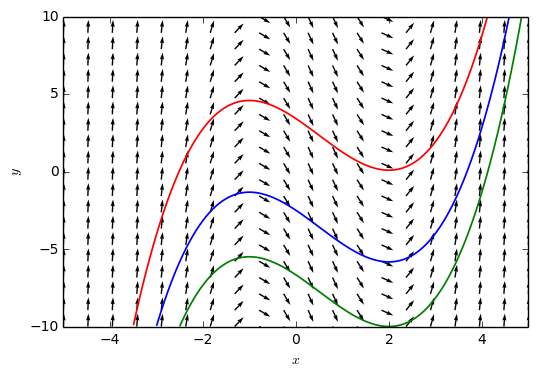

In [4]:
import matplotlib.pyplot as plt
from scipy import *
from scipy import integrate
from scipy.integrate import ode
import numpy as np

fig = plt.figure(num=1)
ax=fig.add_subplot(111)

## Vector field function
def vf(t,x):
  dx=np.zeros(2)
  dx[0]=1
  dx[1]=x[0]**2-x[0]-2
  return dx

#Solution curves
t0=0; tEnd=10; dt=0.01;
r = ode(vf).set_integrator('vode', method='bdf',max_step=dt)
ic=[[-3.5,-10], [-3,-10], [-2.5,-10]]
color=['r','b','g']
for k in range(len(ic)):
    Y=[];T=[];S=[];
    r.set_initial_value(ic[k], t0).set_f_params()
    while r.successful() and r.t +dt < tEnd:
        r.integrate(r.t+dt)
        Y.append(r.y)

    S=np.array(np.real(Y))
    ax.plot(S[:,0],S[:,1], color = color[k], lw = 1.25)

#Vector field
X,Y = np.meshgrid( np.linspace(-5,5,20),np.linspace(-10,10,20) )
U = 1
V = X**2-X-2
#Normalize arrows
N = np.sqrt(U**2+V**2)  
U2, V2 = U/N, V/N
ax.quiver( X,Y,U2, V2)


plt.xlim([-5,5])
plt.ylim([-10,10])
plt.xlabel(r"$x$")
plt.ylabel(r"$y$")
plt.show()

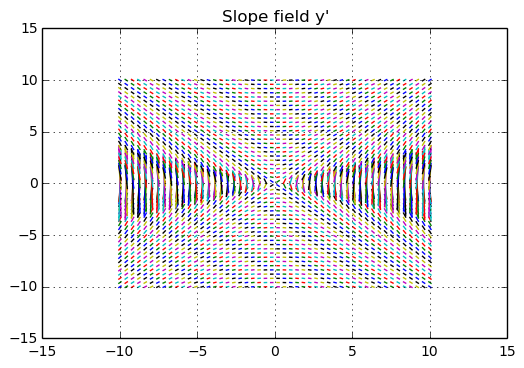

End of the program


### ODE in scipy odeint

http://sam-dolan.staff.shef.ac.uk/mas212


http://sam-dolan.staff.shef.ac.uk/mas212/docs/Solutions4.html


#### First-order Ordinary Differential Equations (ODEs).

In [1]:

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
%matplotlib inline
plt.rcParams.update({'font.size': 14})  # Make the labels larger

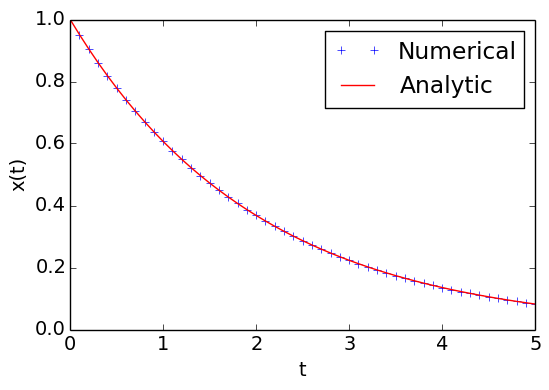

In [12]:


# setup a differential eqution as a function: here the lamba = -0.5
def dxdt(x,t):
    return lamb*x

h = 0.1;   # h is the spacing in time. 
tmax = 5.0; tmin = 0.0;
n = int((tmax-tmin)/h)  # n+1 is the number of points
ts = np.linspace(tmin, tmax, n+1)  # array of t values
x0 = 1.0;    # the initial condition
xexact = np.exp(lamb*ts)  # This is the analytic solution of the ODE
xs = odeint(dxdt, x0, ts)  # The numerical solution.
plt.plot(ts, xs, 'b+', label = 'Numerical');
plt.plot(ts, xexact, 'r-', label = 'Analytic');
plt.xlabel("t"); plt.ylabel("x(t)");
plt.legend()

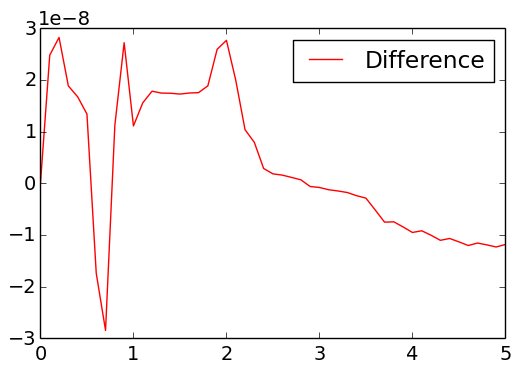

In [13]:
# Now plot the error: the difference between the numerical solution and the analytic solution
# (Here it is necessary to convert 'xs' from a 2D array to a 1D array.)
plt.plot(ts, xs.reshape(n+1) - xexact, 'r-', label = 'Difference');
plt.legend()

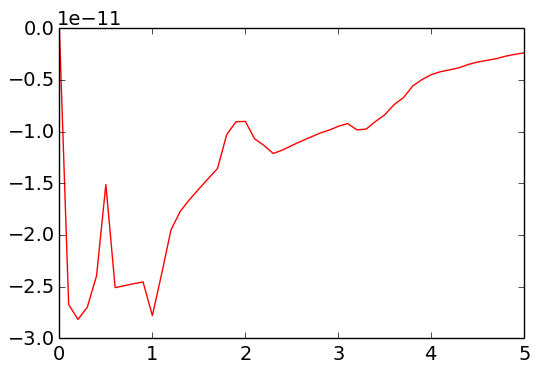

In [14]:

# The error in the first plot is of order 10^(-8). 
# We can reduce the error by adjusting the optional parameters 'atol' and 'rtol' of odeint.
# These parameters fix the absolute and relative errors that odeint will tolerate.
tol = 1e-11;
xs = odeint(dxdt, x0, ts, atol=tol, rtol=tol);
# Note that the error is now approximately 1000 times smaller than before.
plt.plot(ts, xs.reshape(n+1) - xexact, 'r-');

#### Nonlinear differential equation

$$dx/dt = x*(1-x)$$


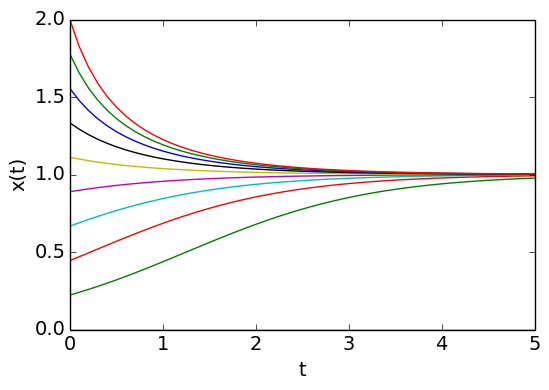

In [15]:
# let us change the initial points
h = 0.1;   # h is the spacing in time. 
tmax = 5.0; tmin = 0.0;
n = int((tmax-tmin)/h)  # n+1 is the number of points
ts = np.linspace(tmin, tmax, n+1)  # array of t values
def dxdt(x,t):
    return x*(1-x)
x0s = np.linspace(0, 2, 10)
for x0 in x0s:
    xs = odeint(dxdt, x0, ts)
    plt.plot(ts, xs)
# x = 1 is a stable equilibrium and x = 0 is the unstable equilibrium
plt.xlabel('t'); plt.ylabel('x(t)');

In [73]:
# lambdify to numpy function
expr = sin(x)/x
g = lambdify(x, expr)
g(3.14)

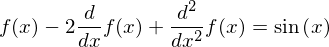

In [30]:
# High order equation.
diffeq = Eq(f(x).diff(x, x) - 2*f(x).diff(x) + f(x), sin(x))
diffeq

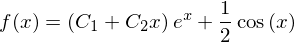

In [31]:
dsolve(diffeq, f(x))

## IPython: Math Processor
http://arachnoid.com/IPython/tips_tricks.html

In [26]:
from sympy import *
var('x')
textplot(E**-x**2,-3,3)

0.99702 |                           /  \                         
        |                          /    \                        
        |                         /      \                       
        |                        .        .                      
        |                                                        
        |                       .          .                     
        |                                                        
        |                      .            .                    
0.49857 | --------------------.--------------.-------------------
        |                                                        
        |                    .                .                  
        |                   .                  .                 
        |                                                        
        |                  .                    .                
        |                 /                      \               
        | 

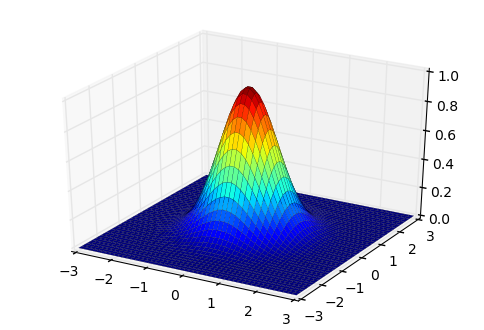

In [27]:


from sympy import *
%matplotlib inline
var('x y')
plotting.plot3d((exp(-(x**2+y**2))),(x,-3,3),(y,-3,3))



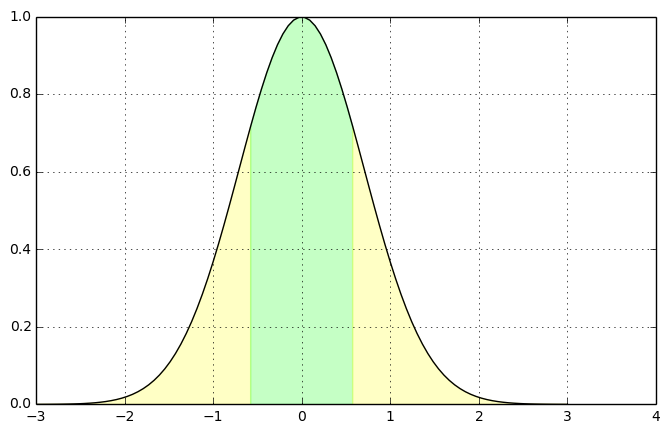

In [28]:
## Confidence interval
import numpy as np
from sympy import *
import matplotlib.pyplot as plt
%matplotlib inline
fig = plt.gcf()
fig.set_size_inches(8,5)
plt.grid(True)
var('x')
f = Lambda(x,E**-x**2)
x = np.linspace(-3,3,100)
y = np.array([f(v) for v in x],dtype='float')
a = 40
b = 60
plt.fill_between(x[:a+1],y[:a+1],0,color='#ffff40',alpha=.3)
plt.fill_between(x[a:b],y[a:b],0,color='#40ff40',alpha=.3)
plt.fill_between(x[b-1:],y[b-1:],0,color='#ffff40',alpha=.3)
plt.plot(x,y,color='black')
plt.show()

In [37]:
import numpy
f = lambdify((x,y), tan(x*y), numpy)

In [39]:
f(1,2)

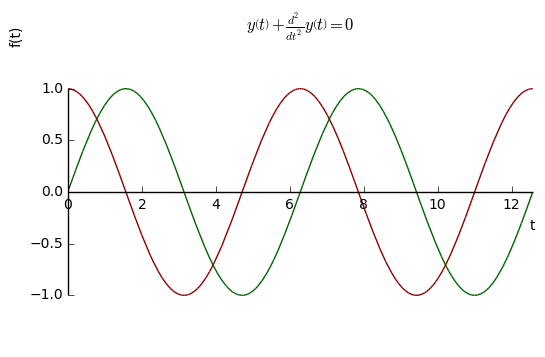

In [29]:
from sympy import *
var('a:z C1 C2');
y = Function('y')
de = diff(y(t),t,t) + y(t)
f = Lambda((t,C1,C2) , dsolve(de,y(t)).args[1])
p = plot(f(t,1,0),f(t,0,1),(t,0,4*pi),ylim=(-1.5,1.5),
   show=False,title='$'+latex(de)+'=0$')
p[0].line_color = 'DarkGreen'
p[1].line_color = 'DarkRed'
p.show()

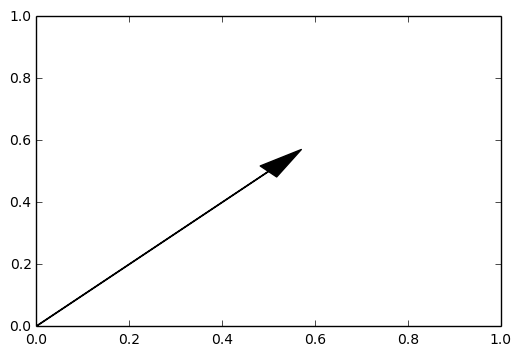

In [39]:
import matplotlib.pyplot as plt

ax = plt.axes()
ax.arrow(0, 0, 0.5, 0.5, head_width=0.05, head_length=0.1, fc='k', ec='k')
plt.show()

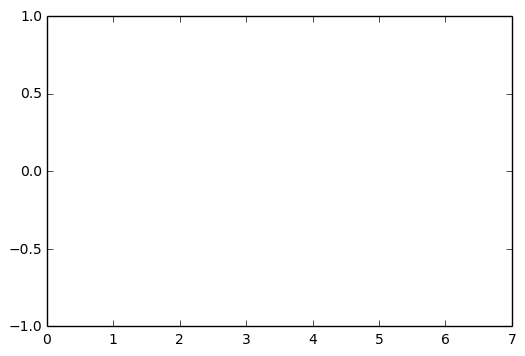

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

fig, ax = plt.subplots()

x = np.arange(0, 2*np.pi, 0.01)
line, = ax.plot(x, np.sin(x))


def animate(i):
    line.set_ydata(np.sin(x + i/10.0))  # update the data
    return line,


# Init only required for blitting to give a clean slate.
def init():
    line.set_ydata(np.ma.array(x, mask=True))
    return line,

ani = animation.FuncAnimation(fig, animate, np.arange(1, 200), init_func=init,
                              interval=25, blit=True)
plt.show()